In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind

import time

In [2]:
file_path = 'archive/heart.csv'
df = pd.read_csv(file_path) 

#  Concise summary of the DataFrame
We want to get an overall picture of what features we have in this dataset.

We also want to see if any any cells are empty.  

In [11]:
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


None

We have 12 features in our dataset and they all have data entries.

-Note- There still might be missing data. We need to explore further.

# Closer look at first 10 rows of data

In [12]:
display(df.head(10))

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


## Attribute Information

* **Age:** age of the patient [years]
* **Sex:** sex of the patient [M: Male, F: Female]
* **ChestPainType:** chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* **RestingBP:** resting blood pressure [mm Hg]
* **Cholesterol:** serum cholesterol [mm/dl]  **<-- Should be mg/dl**
* **FastingBS:** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* **RestingECG:** resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* **MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]
* **ExerciseAngina:** exercise-induced angina [Y: Yes, N: No]
* **Oldpeak:** oldpeak = ST [Numeric value measured in depression]
* **ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* **HeartDisease:** output class [1: heart disease, 0: Normal]

# Basic descriptive and statistics for each column

This will help us see if there are any strange values like a minimum age of 0 or Max Heart Rate (**MaxHR**) of 300 etc.

In [13]:
display(df.describe())

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Problems
### RestingBP - Missing Data
* We have a minimum Resting Blood Pressure of 0 in one or more records - (not a medically possible or valid measurement)

I'm assuming **RestingBP** in mmHg is the Systolic pressure (__Systolic pressure is the highest pressure in the arteries when the heart contracts and pumps blood into the arteries (the systole phase)__)

Need to see what a normal and elevated range of BP would be. But, after quick google search, if the Normal range is <120 mmHG then it seems like most patients in this dataset have elevated blood pressure. This might make sense if this data is of people suspected of heart disease. 

### Cholesterol - Missing Data
* Again, we have one or more zero values here (see min row). This isn't possible so we must assume it's missing data.

The dataset mis-wrote the units for serum cholesterol. It should be mg/dl.
I'm assuming this data represents total cholesterol (as apposed to LDL Cholesterol or HDL cholesterol - one is worse than the other)
Also, a quick google says Optimal/Desirable: Below 200 mg/dL but this might be slightly lower for the UK.

### Fasting Blood Sugar
Can either be higher than 120 mg/dl or lower. If it's higher, then I think this is a diagnosis for diabetes. Between 100-125 mg/dL could be an indication of prediabetes. Need further research.

### MaxHR
I can imagine those at high risk of heart attack would have a lower MaxHR because Doctor would not push their patient while taking this measurement. But could be **Bradycardia** "can be a serious problem if the heart rate is very slow and the heart can't pump enough oxygen-rich blood to the body. If this happens, you may feel dizzy, very tired or weak, and short of breath." source: https://www.mayoclinic.org/diseases-conditions/bradycardia/symptoms-causes/syc-20355474 So these symptoms include Chest pain which would possibly be why this patient is in this dataset.

### Oldpeak = ST [Numeric value measured in depression]
I need to research this, but shouldn't all values be positive? If so, we might have a few problems with one or more records here!

# How much missing data?
## RestingBP

In [30]:
#Creating new dataframe of all records with zero resting blood pressure
df_missing_restingBP = df[df["RestingBP"]==0]
display(df_missing_restingBP.info())
display(df_missing_restingBP.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 449 to 449
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1 non-null      int64  
 1   Sex             1 non-null      object 
 2   ChestPainType   1 non-null      object 
 3   RestingBP       1 non-null      int64  
 4   Cholesterol     1 non-null      int64  
 5   FastingBS       1 non-null      int64  
 6   RestingECG      1 non-null      object 
 7   MaxHR           1 non-null      int64  
 8   ExerciseAngina  1 non-null      object 
 9   Oldpeak         1 non-null      float64
 10  ST_Slope        1 non-null      object 
 11  HeartDisease    1 non-null      int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 104.0+ bytes


None

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


Only 1 record with a 0 mmHg blood pressure. Also, notice the cholesterol value is zero/missing.

Let's see if there are any other unusual values for blood pressure. What records have a range between 0 mmHg and 120 mmHg?

In [4]:
#Sorting blood pressure in ascending order
df_sorted_by_restingBP = df.sort_values(by="RestingBP")
display(df_sorted_by_restingBP.head())
display(df_sorted_by_restingBP.tail())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1
314,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0
227,38,M,ASY,92,117,0,Normal,134,Y,2.5,Flat,1
692,39,F,NAP,94,199,0,Normal,179,N,0.0,Up,0
832,51,M,NAP,94,227,0,Normal,154,Y,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1


Only one record has a 0 mmHg Resting blood pressure. The next, in this ascending list, is 80 mmHg which might be considered low for a 53 year old male (maybe medication or other issues, probably not an error in readings).

## Cholesterol

In [38]:
#Creating new dataframe of all records with cholesterol of 0 mg/dL
df_zero_cholesterol = df[df["Cholesterol"] == 0]

#How many records with missing cholesterol?
display(df_zero_cholesterol.info())


<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 293 to 536
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             172 non-null    int64  
 1   Sex             172 non-null    object 
 2   ChestPainType   172 non-null    object 
 3   RestingBP       172 non-null    int64  
 4   Cholesterol     172 non-null    int64  
 5   FastingBS       172 non-null    int64  
 6   RestingECG      172 non-null    object 
 7   MaxHR           172 non-null    int64  
 8   ExerciseAngina  172 non-null    object 
 9   Oldpeak         172 non-null    float64
 10  ST_Slope        172 non-null    object 
 11  HeartDisease    172 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 17.5+ KB


None

In [44]:
#What percentage of records show 0 cholesterol in dataset?
df_size = len(df)
df_cholesterol_size = len(df_zero_cholesterol)
percentage = round((df_cholesterol_size/df_size) * 100, 1)
print(f"Percentage of cholesterol readings missing in dataset: {percentage}%")

Percentage of cholesterol readings missing in dataset: 18.7%


Whopping 172 records showing missing cholesterol readings or nearly 19%. **Will this be problem?**

Let's investigate further. Could it be that cholesterol wasn't tested for most people with heart disease?

In [48]:
crosstab = pd.crosstab(df['Cholesterol'] == 0, df['HeartDisease']) 
display(crosstab)


HeartDisease,0,1
Cholesterol,,
False,390,356
True,20,152


The **True** row shows us the number of records that have a zero cholesterol reading. Out of the 172 records with zero cholesterol, 152 (or about 88%) have heart disease. 

The **False** row shows the number of records with a non zero value for cholesterol which is split roughly 50% between those with heart disease and those without.
This means, we could drop these records with zero cholesterol and still have a balanced dataset (albeit ~19% smaller than the original).

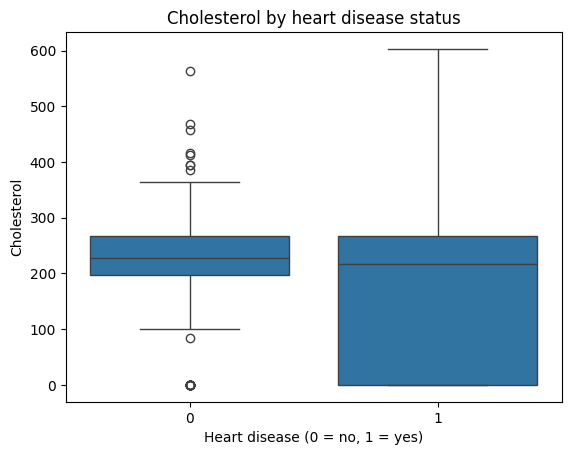

In [50]:
sns.boxplot(
    data=df,
    x="HeartDisease",      # 0 vs 1 on x-axis
    y="Cholesterol"        # distribution of Cholesterol
)
plt.xlabel("Heart disease (0 = no, 1 = yes)")
plt.ylabel("Cholesterol")
plt.title("Cholesterol by heart disease status")
plt.show()

This zero or missing value for cholesterol is really messing with the data and these rows will need to be removed or replaced with synthetic cholesterol data.

What happens to the "Cholesterol by heart disease status" if we remove these missing cholesterol values?

In [53]:
df_clean = df[df["Cholesterol"] != 0 ]
display(df_clean.info())
display(df_clean.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    int64  
 6   RestingECG      746 non-null    object 
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    object 
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    object 
 11  HeartDisease    746 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 75.8+ KB


None

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


This cleaned dataset now has appropraite values for RestingBP and Cholesterol. Oldpeak might still be an issue.

Let's look at Heart disease by cholesterol status again to see if we have resolved our problem.

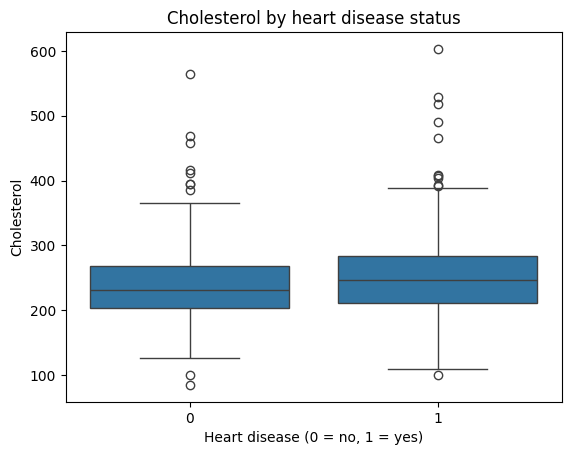

In [54]:
sns.boxplot(
    data=df_clean,
    x="HeartDisease",      # 0 vs 1 on x-axis
    y="Cholesterol"        # distribution of Cholesterol
)
plt.xlabel("Heart disease (0 = no, 1 = yes)")
plt.ylabel("Cholesterol")
plt.title("Cholesterol by heart disease status")
plt.show()

Cholesterol is elevated for heart diseased patients, but is it statistically significant (t-test?).

### After removing the records with values of zero cholesterol, do we still have a balanced dataset?

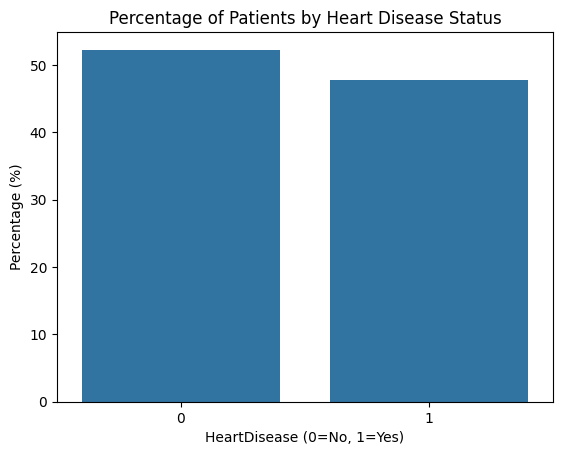

In [57]:
sns.countplot(data=df_clean, x="HeartDisease", stat="percent")
plt.title("Percentage of Patients by Heart Disease Status")
plt.xlabel("HeartDisease (0=No, 1=Yes)")
plt.ylabel("Percentage (%)")
plt.show()

We have roughly 50% of people with heart disease and 50% wihtout heart disease. This dataset is balanced but Heart disease in men and women might have different risk factors. 

### Are men and women balanced in this dataset?

<function matplotlib.pyplot.show(close=None, block=None)>

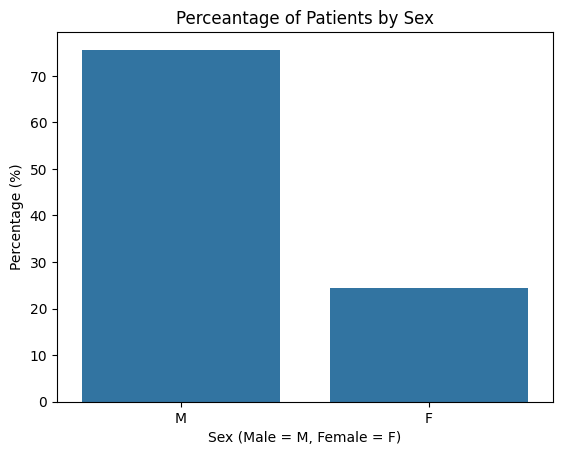

In [59]:
sns.countplot(data=df_clean, x="Sex", stat="percent")
plt.title("Perceantage of Patients by Sex")
plt.xlabel("Sex (Male = M, Female = F)")
plt.ylabel("Percentage (%)")
plt.show

If we were to create two new datasets, one with just male pateitns andthe other with just female patients, would we still have a balanced dataset of heart diseased vs non heart diseased patients?

In [62]:
#Female dataset first
df_female = df_clean[df_clean["Sex"]=="F"]
display(df_female.info())
display(df_female.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 916
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             182 non-null    int64  
 1   Sex             182 non-null    object 
 2   ChestPainType   182 non-null    object 
 3   RestingBP       182 non-null    int64  
 4   Cholesterol     182 non-null    int64  
 5   FastingBS       182 non-null    int64  
 6   RestingECG      182 non-null    object 
 7   MaxHR           182 non-null    int64  
 8   ExerciseAngina  182 non-null    object 
 9   Oldpeak         182 non-null    float64
 10  ST_Slope        182 non-null    object 
 11  HeartDisease    182 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 18.5+ KB


None

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.00000
mean,52.197802,131.978022,255.774725,0.104396,147.000000,0.664286,0.21978
std,9.339774,18.591258,62.850070,0.306617,21.963556,0.959506,0.41524
min,30.000000,94.000000,141.000000,0.000000,90.000000,0.000000,0.00000
25%,45.250000,120.000000,210.250000,0.000000,130.000000,0.000000,0.00000
50%,53.000000,130.000000,248.000000,0.000000,150.000000,0.000000,0.00000
75%,58.750000,140.000000,294.000000,0.000000,163.000000,1.000000,0.00000
max,76.000000,200.000000,564.000000,1.000000,192.000000,6.200000,1.00000


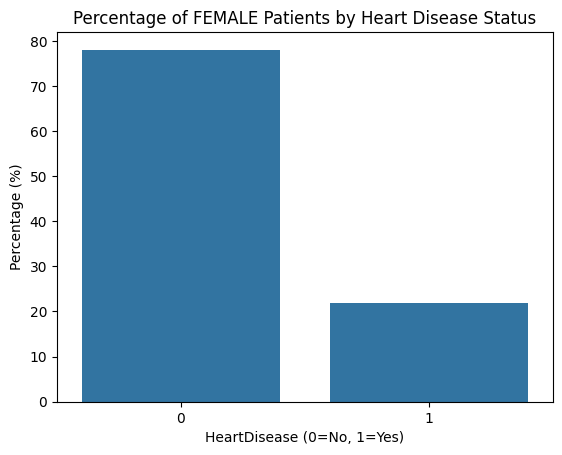

In [65]:
sns.countplot(data=df_female, x="HeartDisease", stat="percent")
plt.title("Percentage of FEMALE Patients by Heart Disease Status")
plt.xlabel("HeartDisease (0=No, 1=Yes)")
plt.ylabel("Percentage (%)")
plt.show()

We have an **unbalanced dataset** for female patients with and without heart disease. Synthetic data may be needed.

In [63]:
#Male datset
df_male = df_clean[df_clean["Sex"]=="M"]
display(df_male.info())
display(df_male.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             564 non-null    int64  
 1   Sex             564 non-null    object 
 2   ChestPainType   564 non-null    object 
 3   RestingBP       564 non-null    int64  
 4   Cholesterol     564 non-null    int64  
 5   FastingBS       564 non-null    int64  
 6   RestingECG      564 non-null    object 
 7   MaxHR           564 non-null    int64  
 8   ExerciseAngina  564 non-null    object 
 9   Oldpeak         564 non-null    float64
 10  ST_Slope        564 non-null    object 
 11  HeartDisease    564 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 57.3+ KB


None

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,53.102837,133.359929,241.040780,0.187943,138.040780,0.978191,0.560284
std,9.556603,16.842386,57.509194,0.391014,24.922903,1.096840,0.496793
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,206.750000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,234.000000,0.000000,139.500000,0.800000,1.000000
75%,59.000000,140.000000,272.250000,0.000000,156.000000,1.800000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,5.600000,1.000000


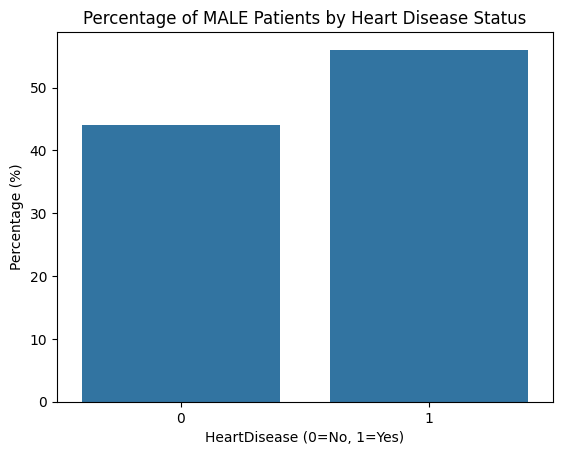

In [66]:
sns.countplot(data=df_male, x="HeartDisease", stat="percent")
plt.title("Percentage of MALE Patients by Heart Disease Status")
plt.xlabel("HeartDisease (0=No, 1=Yes)")
plt.ylabel("Percentage (%)")
plt.show()

The male dataset is more balanced but still a bit skewed towards heart disease. If training a model, model may be biased towards heart disease prediction. 

## Oldpeak

In [27]:
#Create dataframe of all records with negative Oldpeak values.
df_neg_Oldpeak = df[df["Oldpeak"]<0]

display(df_neg_Oldpeak.info())

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 321 to 512
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             13 non-null     int64  
 1   Sex             13 non-null     object 
 2   ChestPainType   13 non-null     object 
 3   RestingBP       13 non-null     int64  
 4   Cholesterol     13 non-null     int64  
 5   FastingBS       13 non-null     int64  
 6   RestingECG      13 non-null     object 
 7   MaxHR           13 non-null     int64  
 8   ExerciseAngina  13 non-null     object 
 9   Oldpeak         13 non-null     float64
 10  ST_Slope        13 non-null     object 
 11  HeartDisease    13 non-null     int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 1.3+ KB


None

In [17]:
display(df_neg_Oldpeak.head(13))

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,M,ASY,100,0,1,Normal,109,N,-0.9,Flat,1
324,46,M,ASY,100,0,1,ST,133,N,-2.6,Flat,1
325,42,M,ASY,105,0,1,Normal,128,Y,-1.5,Down,1
326,45,M,NAP,110,0,0,Normal,138,N,-0.1,Up,0
331,56,M,ASY,115,0,1,ST,82,N,-1.0,Up,1
332,38,M,NAP,100,0,0,Normal,179,N,-1.1,Up,0
334,51,M,ASY,130,0,1,Normal,170,N,-0.7,Up,1
335,62,M,TA,120,0,1,LVH,134,N,-0.8,Flat,1
352,56,M,ASY,120,0,0,ST,100,Y,-1.0,Down,1
407,62,M,ASY,115,0,1,Normal,72,Y,-0.5,Flat,1


I want to investigate whether these negative Oldpeak values have anyhting to do with heart disease diagnosis.

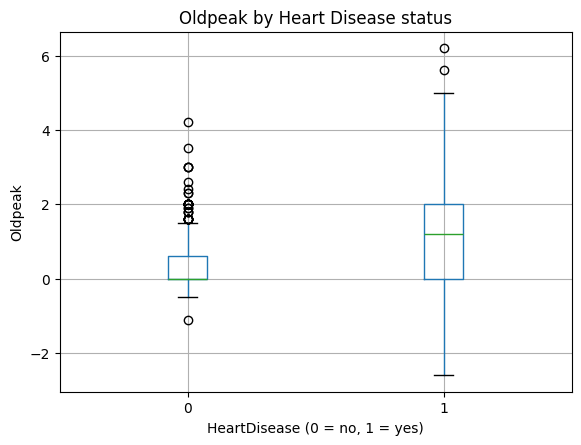

In [49]:
df.boxplot(column="Oldpeak", by="HeartDisease")
plt.title("Oldpeak by Heart Disease status")
plt.suptitle("")  # optional: remove automatic super-title
plt.xlabel("HeartDisease (0 = no, 1 = yes)")
plt.ylabel("O")
plt.show()

Heart diseased patients have higher values of Oldpeak and higher range but both groups have negative readings. Are these negative readings incorrect values (e.g. accidentally set to negative)?

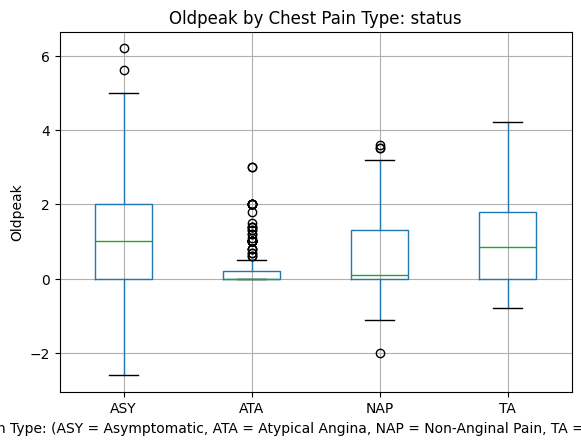

In [25]:
df.boxplot(column="Oldpeak", by="ChestPainType")
plt.title("Oldpeak by Chest Pain Type: status")
plt.suptitle("")  # optional: remove automatic super-title
plt.xlabel("ChestPain Type: (ASY = Asymptomatic, ATA = Atypical Angina, NAP = Non-Anginal Pain, TA = Typical Angina)")
plt.ylabel("Oldpeak")
plt.show()


I need to learn what the negative values mean.

In [ ]:

#group_missing = df[df["Cholesterol"]==0]
#group_valid = df[df["Cholesterol"] > 0]

In [12]:
# Chi-square test 
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Chi-square p-value: {p}")

Chi-square p-value: 9.504752634875948e-22


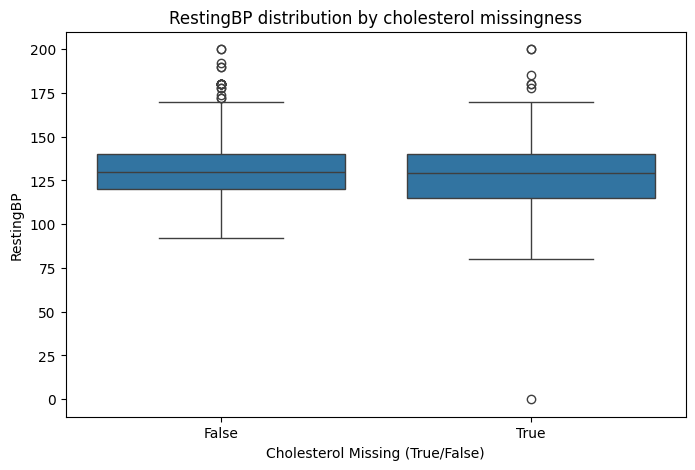

In [20]:
plt.figure(figsize=(8,5))
sb.boxplot(x=(df['Cholesterol']==0), y=df['RestingBP'])
plt.xlabel("Cholesterol Missing (True/False)")
plt.ylabel("RestingBP")
plt.title("RestingBP distribution by cholesterol missingness")
plt.show()
